# Exercise: Cherry Blossoms!

#### Summary

Once upon a time it was サクラ season, which meant the [cherry blossoms](https://en.wikipedia.org/wiki/Cherry_blossom) were in full bloom! This year they bloomed a little early and they've long sinced faded, so for today we'll stick with data-driven blossoms: http://atmenv.envi.osakafu-u.ac.jp/aono/kyophenotemp4/

#### Data Source(s)

Historical Series of Phenological data for Cherry Tree Flowering at Kyoto City
(and March Mean Temperature Reconstructions), http://atmenv.envi.osakafu-u.ac.jp/aono/kyophenotemp4/

#### Files

- KyotoFullFlower7.xls, "Full-flowering Dates of Prunus jamasakura in Kyoto City"

#### Skills

- Working with Excel files
- Ignoring the first few rows
- Replacing NaN values
- Counting and summarizing columns
- Replacing non-NaN values
- Extracting with strings
- Rolling means

# Read in `KyotoFullFlower7.xls`

Be sure to look at the first five rows.

In [57]:
import pandas as pd
import numpy as np
import re
import statistics
%matplotlib inline

In [58]:
df = pd.read_excel('KyotoFullFlower7.xls')
df

,"Full-flowering dates of Japanese cherry (Prunus jamasakura) at Kyoto, Japan. (Latest version, Jun. 12, 2012)",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5
0,This phenological data was acquired by followi...,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN
2,Column A; A.D.,NaN,NaN,NaN,NaN,NaN
3,Column B; Full-flowering date (day of year).,NaN,NaN,NaN,NaN,NaN
4,"Column C; Full-flowering date (calender date, ...",NaN,NaN,NaN,NaN,NaN
5,Column D; Source code,NaN,NaN,NaN,NaN,NaN
6,"1; Reported by Taguchi (1939), J. Marine Mete...",NaN,NaN,NaN,NaN,NaN
7,"2; Added by Sekiguchi (1969), Tokyo Geography...",NaN,NaN,NaN,NaN,NaN
8,"3; Added by Aono and Omoto (1994), J. Agric. ...",NaN,NaN,NaN,NaN,NaN
9,"4; Added by Aono and Kazui (2008), Int. J. Cl...",NaN,NaN,NaN,NaN,NaN


### That... doesn't look right. Why not? 

Examine your column names, and maybe even open up the file in Excel.

In [59]:
df = pd.read_excel('KyotoFullFlower7.xls', skiprows=25)
df

,AD,Full-flowering date (DOY),Full-flowering date,Source code,Data type code,Reference Name
0,801,NaN,NaN,NaN,NaN,-
1,802,NaN,NaN,NaN,NaN,-
2,803,NaN,NaN,NaN,NaN,-
3,804,NaN,NaN,NaN,NaN,-
4,805,NaN,NaN,NaN,NaN,-
5,806,NaN,NaN,NaN,NaN,-
6,807,NaN,NaN,NaN,NaN,-
7,808,NaN,NaN,NaN,NaN,-
8,809,NaN,NaN,NaN,NaN,-
9,810,NaN,NaN,NaN,NaN,-


### Read in the file correctly, and look at the first five rows

- TIP: The first year should be 801 AD, and it should not have any dates or anything.

In [60]:
df.head()

,AD,Full-flowering date (DOY),Full-flowering date,Source code,Data type code,Reference Name
0,801,NaN,NaN,NaN,NaN,-
1,802,NaN,NaN,NaN,NaN,-
2,803,NaN,NaN,NaN,NaN,-
3,804,NaN,NaN,NaN,NaN,-
4,805,NaN,NaN,NaN,NaN,-


### Look at the final five rows of the data

In [61]:
df.tail()

,AD,Full-flowering date (DOY),Full-flowering date,Source code,Data type code,Reference Name
1210,2011,99.0,409.0,8.0,0.0,NEWS-PAPER(ARASHIYAMA)
1211,2012,101.0,410.0,8.0,0.0,NEWS-PAPER(ARASHIYAMA)
1212,2013,93.0,403.0,8.0,0.0,NEWS-PAPER(ARASHIYAMA)
1213,2014,94.0,404.0,8.0,0.0,NEWS-PAPER(ARASHIYAMA)
1214,2015,93.0,403.0,8.0,0.0,NEWS-PAPER(ARASHIYAMA)


## Watching out for NaN values

Take a look at **Reference name**. Is there something you should set to be `NaN`? Use either of the two ways we have covered.

In [62]:
df = pd.read_excel('KyotoFullFlower7.xls', skiprows=25, na_values='-')
df.head()

,AD,Full-flowering date (DOY),Full-flowering date,Source code,Data type code,Reference Name
0,801,NaN,NaN,NaN,NaN,NaN
1,802,NaN,NaN,NaN,NaN,NaN
2,803,NaN,NaN,NaN,NaN,NaN
3,804,NaN,NaN,NaN,NaN,NaN
4,805,NaN,NaN,NaN,NaN,NaN


### Check that you have 827 values for "Full-flowering date (DOY)" and 825 for "Reference Name"

In [63]:
df['Full-flowering date (DOY)'].count()

827

In [64]:
df['Reference Name'].count()

825

# Cleaning up our data

## What sources are the most common as a reference?

In [65]:
df['Reference Name'].value_counts().head(1)

NEWS-PAPER(ARASHIYAMA)    94
Name: Reference Name, dtype: int64

## Filter the list to only include rows that have a `Full-flowering date (DOY)`

In [66]:
df_DOY_notnull = df[df['Full-flowering date (DOY)'].notnull()]

## Make a histogram of the full-flowering date.

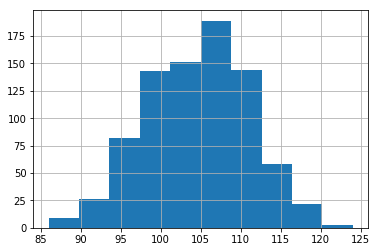

In [67]:
df_DOY_notnull['Full-flowering date (DOY)'].hist()

## Make another histogram of the full-flowering date, but with 39 bins instead of 10

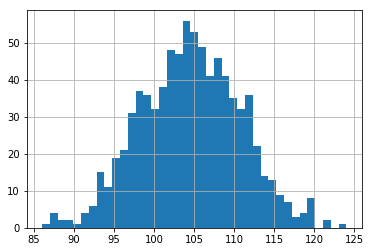

In [68]:
df['Full-flowering date (DOY)'].hist(bins=39)

## What's the average number of days it takes for the flowers to blossom? The max? Min? And how many records do we have?

Answer these with one line of code.

In [69]:
df_DOY_notnull.head()

,AD,Full-flowering date (DOY),Full-flowering date,Source code,Data type code,Reference Name
11,812,92.0,401.0,1.0,2.0,NIHON-KOKI
14,815,105.0,415.0,1.0,2.0,NIHON-KOKI
30,831,96.0,406.0,1.0,2.0,NIHON-KOKI
50,851,108.0,418.0,1.0,2.0,MONTOKUTENNO-JITSUROKU
52,853,104.0,414.0,1.0,2.0,MONTOKUTENNO-JITSUROKU


## What's the average number of days into the year cherry flowers normally blossomed before 1900?

In [70]:
df_DOY_notnull[df_DOY_notnull['AD'] < 1900]['Full-flowering date (DOY)'].mean()

105.20728291316527

## How about after 1900?

In [71]:
df_DOY_notnull[df_DOY_notnull['AD'] >= 1900]['Full-flowering date (DOY)'].mean()

100.32743362831859

## How many times was our data from a title in Japanese poetry?

You'll need to read the documentation inside of the Excel file.

In [72]:
df_DOY_notnull[df_DOY_notnull['Data type code'] == 4.0].count()

AD                           39
Full-flowering date (DOY)    39
Full-flowering date          39
Source code                  39
Data type code               39
Reference Name               39
dtype: int64

## Actually, that looks terrible. Replace the "Source code" and "data type code" columns with the values they stand for.

In [73]:
replacements_d = {
    0.0: 'data from modern times (full-bloom date since 1880s)',
    1.0: 'data from diary description about full-bloom',
    2.0: 'data from diary description about cherry blossom viewing party',
    3.0: 'data from diary description about presents of cherry twigs from party participants',
    4.0: 'data from title in Japanese poety',
    8.0: 'Deduced from wisteria phenology, using the relation proposed by Aono and Saito (2010)',
    9.0: 'Deduced from Japanese kerria phenology, using the relation proposed by Aono (2011)'
}

In [74]:
replacements_s = {
    1.0: 'Reported by Taguchi (1939), J. Marine Meteorol. Soc. (Umi to Sora), 19, 217-227',
    2.0: 'Added by Sekiguchi (1969), Tokyo Geography Papers, 13, 175-190.',
    3.0: 'Added by Aono and Omoto (1994), J. Agric. Meteorol., 49, 263-272.',
    4.0: 'Added by Aono and Kazui (2008), Int. J. Climatol., 28, 905-914 (doi: 10.1002/joc.1594).',
    5.0: 'Cherry phenological data, Added by Aono and Saito (2010), Int. J. Biometeorol., 54, 211-219.',
    6.0: 'Added by Aono (2011), Time Studies, 4, 17-29. (in Japanese with English abstract)',
    7.0: 'Added by Aono (2012), Chikyu Kankyo, 17, 21-29. (in Japanese)',
    8.0: 'Found after the last publication of articles.'
}

In [75]:
df_DOY_notnull['Data type code'].replace(replacements_d, inplace=True)
df_DOY_notnull['Source code'].replace(replacements_s, inplace=True)
df_DOY_notnull

/usr/local/lib/python3.6/site-packages/pandas/core/generic.py:3924: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


,AD,Full-flowering date (DOY),Full-flowering date,Source code,Data type code,Reference Name
11,812,92.0,401.0,"Reported by Taguchi (1939), J. Marine Meteorol...",data from diary description about cherry bloss...,NIHON-KOKI
14,815,105.0,415.0,"Reported by Taguchi (1939), J. Marine Meteorol...",data from diary description about cherry bloss...,NIHON-KOKI
30,831,96.0,406.0,"Reported by Taguchi (1939), J. Marine Meteorol...",data from diary description about cherry bloss...,NIHON-KOKI
50,851,108.0,418.0,"Reported by Taguchi (1939), J. Marine Meteorol...",data from diary description about cherry bloss...,MONTOKUTENNO-JITSUROKU
52,853,104.0,414.0,"Reported by Taguchi (1939), J. Marine Meteorol...",data from diary description about cherry bloss...,MONTOKUTENNO-JITSUROKU
63,864,100.0,409.0,"Reported by Taguchi (1939), J. Marine Meteorol...",data from diary description about cherry bloss...,NIPPON-SANDAI-JITSUROKU
65,866,106.0,416.0,"Reported by Taguchi (1939), J. Marine Meteorol...",data from diary description about cherry bloss...,NIPPON-SANDAI-JITSUROKU
68,869,95.0,405.0,"Cherry phenological data, Added by Aono and Sa...",data from diary description about cherry bloss...,KANKE-BUNSOU
88,889,104.0,414.0,"Cherry phenological data, Added by Aono and Sa...",data from diary description about cherry bloss...,NIPPON-SANDAI-JITSUROKU
90,891,109.0,419.0,"Cherry phenological data, Added by Aono and Sa...",data from title in Japanese poety,NIHONKIRYAKU


## Show only the years where our data was from a title in Japanese poetry

In [92]:
df_DOY_notnull[df_DOY_notnull['Data type code'] == 'data from title in Japanese poety']

,AD,Full-flowering date (DOY),Full-flowering date,Source code,Data type code,Reference Name
90,891,109.0,419.0,"Cherry phenological data, Added by Aono and Sa...",data from title in Japanese poety,NIHONKIRYAKU
94,895,104.0,414.0,"Cherry phenological data, Added by Aono and Sa...",data from title in Japanese poety,NIHONKIRYAKU
95,896,104.0,413.0,"Cherry phenological data, Added by Aono and Sa...",data from title in Japanese poety,NIPPON-SANDAI-JITSUROKU
122,923,104.0,414.0,"Cherry phenological data, Added by Aono and Sa...",data from title in Japanese poety,ZOKU-KOKIN-WAKASHU
154,955,89.0,330.0,"Cherry phenological data, Added by Aono and Sa...",data from title in Japanese poety,SHUISHO
168,969,98.0,408.0,"Cherry phenological data, Added by Aono and Sa...",data from title in Japanese poety,NIHONKIRYAKU
206,1007,106.0,416.0,"Cherry phenological data, Added by Aono and Sa...",data from title in Japanese poety,MIDO-KAMPAKUKI
232,1033,102.0,412.0,"Cherry phenological data, Added by Aono and Sa...",data from title in Japanese poety,NIHONKIRYAKU
235,1036,104.0,413.0,"Cherry phenological data, Added by Aono and Sa...",data from title in Japanese poety,NIHONKIRYAKU
259,1060,108.0,417.0,"Cherry phenological data, Added by Aono and Sa...",data from title in Japanese poety,SHIN-SENZAI-WAKASHU


## Graph the full-flowering date (DOY) over time

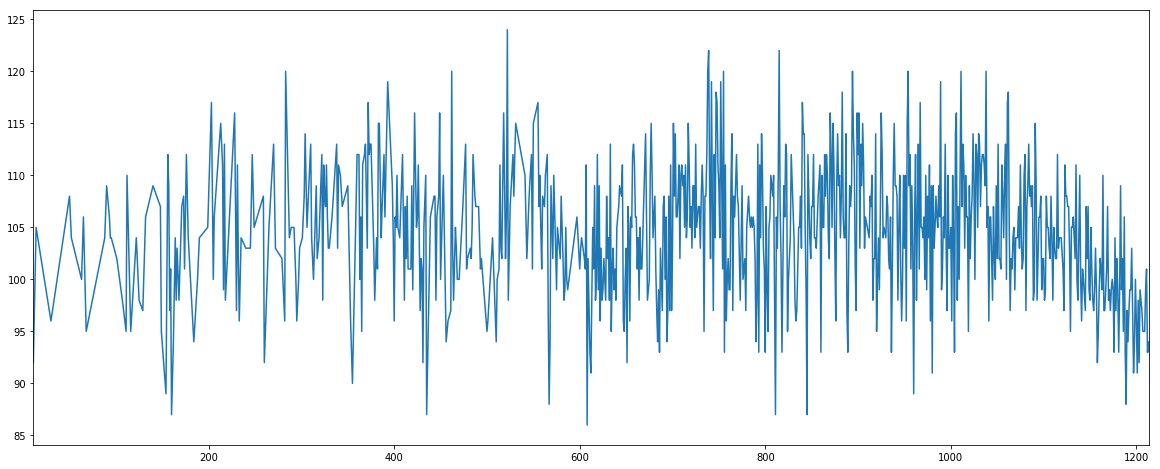

In [90]:
df_DOY_notnull['Full-flowering date (DOY)'].plot(figsize=(20,8))

## 15. Smooth out the graph

It's so jagged! You can use `df.rolling` to calculate a rolling average.

The following code calculates a **10-year mean**, using the `AD` column as the anchor. If there aren't 20 samples to work with in a row, it'll accept down to 5. Neat, right?

(We're only looking at the final 5)

In [95]:
df_DOY_notnull.rolling(10, on='AD', min_periods=5).mean().tail()
# If this gives you an error you're using an old pandas version,
# so you can use df.set_index('AD').rolling(10, min_periods=5).mean().reset_index().tail()
# instead

,AD,Full-flowering date (DOY),Full-flowering date,Source code,Data type code,Reference Name
1210,2011,95.9,405.7,Found after the last publication of articles.,data from modern times (full-bloom date since ...,NEWS-PAPER(ARASHIYAMA)
1211,2012,96.9,406.6,Found after the last publication of articles.,data from modern times (full-bloom date since ...,NEWS-PAPER(ARASHIYAMA)
1212,2013,96.4,406.1,Found after the last publication of articles.,data from modern times (full-bloom date since ...,NEWS-PAPER(ARASHIYAMA)
1213,2014,96.6,406.4,Found after the last publication of articles.,data from modern times (full-bloom date since ...,NEWS-PAPER(ARASHIYAMA)
1214,2015,96.0,405.8,Found after the last publication of articles.,data from modern times (full-bloom date since ...,NEWS-PAPER(ARASHIYAMA)


Adjust the code above to compute **and graph** a 20-year rolling average for the entire dataset.

In [96]:
df_DOY_notnull.rolling(20, on='AD', min_periods=5).mean()

,AD,Full-flowering date (DOY),Full-flowering date,Source code,Data type code,Reference Name
11,812,NaN,NaN,"Reported by Taguchi (1939), J. Marine Meteorol...",data from diary description about cherry bloss...,NIHON-KOKI
14,815,NaN,NaN,"Reported by Taguchi (1939), J. Marine Meteorol...",data from diary description about cherry bloss...,NIHON-KOKI
30,831,NaN,NaN,"Reported by Taguchi (1939), J. Marine Meteorol...",data from diary description about cherry bloss...,NIHON-KOKI
50,851,NaN,NaN,"Reported by Taguchi (1939), J. Marine Meteorol...",data from diary description about cherry bloss...,MONTOKUTENNO-JITSUROKU
52,853,101.000000,410.800000,"Reported by Taguchi (1939), J. Marine Meteorol...",data from diary description about cherry bloss...,MONTOKUTENNO-JITSUROKU
63,864,100.833333,410.500000,"Reported by Taguchi (1939), J. Marine Meteorol...",data from diary description about cherry bloss...,NIPPON-SANDAI-JITSUROKU
65,866,101.571429,411.285714,"Reported by Taguchi (1939), J. Marine Meteorol...",data from diary description about cherry bloss...,NIPPON-SANDAI-JITSUROKU
68,869,100.750000,410.500000,"Cherry phenological data, Added by Aono and Sa...",data from diary description about cherry bloss...,KANKE-BUNSOU
88,889,101.111111,410.888889,"Cherry phenological data, Added by Aono and Sa...",data from diary description about cherry bloss...,NIPPON-SANDAI-JITSUROKU
90,891,101.900000,411.700000,"Cherry phenological data, Added by Aono and Sa...",data from title in Japanese poety,NIHONKIRYAKU


# Adding a month column

### HOLD ON, time to learn something

**There are a few ways to do the next question**, but a couple popular methods will have pandas yell at you. You might want to try this new thing called `loc`! **It is used to update a column in a row based on a condition.**

```
df.loc[df.country == 'Angola', "continent"] = "Africa"
```

This updates the `continent` column to be `Africa` for every row where `df.country == 'Angola'`. You CANNOT do the following, which is probably what you've wanted to do:

```
df[df.country == 'Angola']['continent'] = 'Africa'
```

And now you know.

### Actually adding our column

Right now the "Full-flowering date" column is pretty rough. It uses numbers like '402' to mean "April 2nd" and "416" to mean "April 16th." Let's make a column to explain what month it happened in.

* Every row that happened in April should have 'April' in the `month` column.
* Every row that happened in March should have 'March' as the `month` column.
* Every row that happened in May should have 'May' as the `month` column.

In [106]:
months = {
    '1': 'January',
    '2': 'February',
    '3': 'March',
    '4': 'April',
    '5': 'May',
    '6': 'June',
    '7': 'July',
    '8': 'August',
    '9': 'September',
    '10': 'October',
    '11': 'November',
    '12': 'December'
}

In [107]:
df_DOY_notnull['Full-flowering date'].dtypes

dtype('float64')

In [108]:
df_DOY_notnull['month'] = df_DOY_notnull['Full-flowering date'].astype(str).str.extract('(\d)')
df_DOY_notnull

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,AD,Full-flowering date (DOY),Full-flowering date,Source code,Data type code,Reference Name,month
11,812,92.0,401.0,"Reported by Taguchi (1939), J. Marine Meteorol...",data from diary description about cherry bloss...,NIHON-KOKI,4
14,815,105.0,415.0,"Reported by Taguchi (1939), J. Marine Meteorol...",data from diary description about cherry bloss...,NIHON-KOKI,4
30,831,96.0,406.0,"Reported by Taguchi (1939), J. Marine Meteorol...",data from diary description about cherry bloss...,NIHON-KOKI,4
50,851,108.0,418.0,"Reported by Taguchi (1939), J. Marine Meteorol...",data from diary description about cherry bloss...,MONTOKUTENNO-JITSUROKU,4
52,853,104.0,414.0,"Reported by Taguchi (1939), J. Marine Meteorol...",data from diary description about cherry bloss...,MONTOKUTENNO-JITSUROKU,4
63,864,100.0,409.0,"Reported by Taguchi (1939), J. Marine Meteorol...",data from diary description about cherry bloss...,NIPPON-SANDAI-JITSUROKU,4
65,866,106.0,416.0,"Reported by Taguchi (1939), J. Marine Meteorol...",data from diary description about cherry bloss...,NIPPON-SANDAI-JITSUROKU,4
68,869,95.0,405.0,"Cherry phenological data, Added by Aono and Sa...",data from diary description about cherry bloss...,KANKE-BUNSOU,4
88,889,104.0,414.0,"Cherry phenological data, Added by Aono and Sa...",data from diary description about cherry bloss...,NIPPON-SANDAI-JITSUROKU,4
90,891,109.0,419.0,"Cherry phenological data, Added by Aono and Sa...",data from title in Japanese poety,NIHONKIRYAKU,4


In [111]:
df_DOY_notnull['month'].replace(months, inplace=True)

/usr/local/lib/python3.6/site-packages/pandas/core/generic.py:3924: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


### Using your new column, how many blossomings happened in each month?

In [112]:
df_DOY_notnull['month'].value_counts()

April    814
March     10
May        3
Name: month, dtype: int64

### Graph how many blossomings happened in each month.

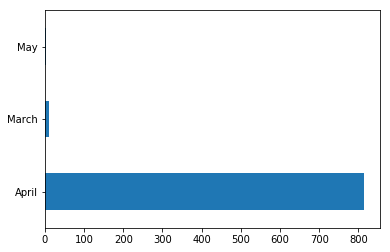

In [113]:
df_DOY_notnull['month'].value_counts().plot(kind='barh')

## 19. Adding a day-of-month column

Now we're going to add a new column called **day-of-month** based on the full-flowering date.

- 402 means "April 2"
- 312 means "March 12"
- 511 means "May 11"

**We're only interested in the second part**. Previously I've had students convert them to integers to do this, but you know regular expressions!

- Tip: You won't be able to extract anything from a float, you'll need it to be a string
- Tip: There are two things that mean "talk about this column as a string," maybe you want me to talk about them?

In [114]:
df_DOY_notnull['day-of-mont'] = df_DOY_notnull['Full-flowering date'].astype(str).str.extract('\d(\d\d)')
df_DOY_notnull

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,AD,Full-flowering date (DOY),Full-flowering date,Source code,Data type code,Reference Name,month,day-of-mont
11,812,92.0,401.0,"Reported by Taguchi (1939), J. Marine Meteorol...",data from diary description about cherry bloss...,NIHON-KOKI,April,01
14,815,105.0,415.0,"Reported by Taguchi (1939), J. Marine Meteorol...",data from diary description about cherry bloss...,NIHON-KOKI,April,15
30,831,96.0,406.0,"Reported by Taguchi (1939), J. Marine Meteorol...",data from diary description about cherry bloss...,NIHON-KOKI,April,06
50,851,108.0,418.0,"Reported by Taguchi (1939), J. Marine Meteorol...",data from diary description about cherry bloss...,MONTOKUTENNO-JITSUROKU,April,18
52,853,104.0,414.0,"Reported by Taguchi (1939), J. Marine Meteorol...",data from diary description about cherry bloss...,MONTOKUTENNO-JITSUROKU,April,14
63,864,100.0,409.0,"Reported by Taguchi (1939), J. Marine Meteorol...",data from diary description about cherry bloss...,NIPPON-SANDAI-JITSUROKU,April,09
65,866,106.0,416.0,"Reported by Taguchi (1939), J. Marine Meteorol...",data from diary description about cherry bloss...,NIPPON-SANDAI-JITSUROKU,April,16
68,869,95.0,405.0,"Cherry phenological data, Added by Aono and Sa...",data from diary description about cherry bloss...,KANKE-BUNSOU,April,05
88,889,104.0,414.0,"Cherry phenological data, Added by Aono and Sa...",data from diary description about cherry bloss...,NIPPON-SANDAI-JITSUROKU,April,14
90,891,109.0,419.0,"Cherry phenological data, Added by Aono and Sa...",data from title in Japanese poety,NIHONKIRYAKU,April,19


Now that you've successfully extracted the last two letters, save them into a new column called `'day-of-month'`

### 20. Adding a date column

Now take the `'month'` and `'day-of-month'` columns and combine them in order to create a new column called `'date'`. If should look like "April 09".

In [121]:
df_DOY_notnull['date'] = df_DOY_notnull['month'] + " " + df_DOY_notnull['day-of-mont']
df_DOY_notnull

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,AD,Full-flowering date (DOY),Full-flowering date,Source code,Data type code,Reference Name,month,day-of-mont,date
11,812,92.0,401.0,"Reported by Taguchi (1939), J. Marine Meteorol...",data from diary description about cherry bloss...,NIHON-KOKI,April,01,April 01
14,815,105.0,415.0,"Reported by Taguchi (1939), J. Marine Meteorol...",data from diary description about cherry bloss...,NIHON-KOKI,April,15,April 15
30,831,96.0,406.0,"Reported by Taguchi (1939), J. Marine Meteorol...",data from diary description about cherry bloss...,NIHON-KOKI,April,06,April 06
50,851,108.0,418.0,"Reported by Taguchi (1939), J. Marine Meteorol...",data from diary description about cherry bloss...,MONTOKUTENNO-JITSUROKU,April,18,April 18
52,853,104.0,414.0,"Reported by Taguchi (1939), J. Marine Meteorol...",data from diary description about cherry bloss...,MONTOKUTENNO-JITSUROKU,April,14,April 14
63,864,100.0,409.0,"Reported by Taguchi (1939), J. Marine Meteorol...",data from diary description about cherry bloss...,NIPPON-SANDAI-JITSUROKU,April,09,April 09
65,866,106.0,416.0,"Reported by Taguchi (1939), J. Marine Meteorol...",data from diary description about cherry bloss...,NIPPON-SANDAI-JITSUROKU,April,16,April 16
68,869,95.0,405.0,"Cherry phenological data, Added by Aono and Sa...",data from diary description about cherry bloss...,KANKE-BUNSOU,April,05,April 05
88,889,104.0,414.0,"Cherry phenological data, Added by Aono and Sa...",data from diary description about cherry bloss...,NIPPON-SANDAI-JITSUROKU,April,14,April 14
90,891,109.0,419.0,"Cherry phenological data, Added by Aono and Sa...",data from title in Japanese poety,NIHONKIRYAKU,April,19,April 19
